In [1]:
import hydra
from omegaconf import OmegaConf
import train
from clip2latent import train_utils
import torch
import numpy as np

/home/jpinkney/miniconda3/envs/clip2latent/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
from hydra import compose, initialize
from omegaconf import OmegaConf

with initialize(config_path="config"):
    cfg = compose(config_name="config")
    print(OmegaConf.to_yaml(cfg))
cfg.data.embed_noise_scale =0
cfg.data.bs = 256

model:
  network:
    dim: 512
    num_timesteps: 1000
    depth: 12
    dim_head: 64
    heads: 12
  diffusion:
    image_embed_dim: ${model.network.dim}
    timesteps: ${model.network.num_timesteps}
    cond_drop_prob: 0.2
    image_embed_scale: 1.0
    text_embed_scale: 1.0
    beta_schedule: cosine
    predict_x_start: true
data:
  bs: 512
  format: webdataset
  path: data/webdataset/sg2-ffhq-1024-clip/{00000..99}.tar
  embed_noise_scale: 0.75
  sg_pkl: https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan2/versions/1/files/stylegan2-ffhq-1024x1024.pkl
  clip_variant: ViT-B/32
  n_latents: 1
  latent_dim: 512
  latent_repeats:
  - 18
  val_im_samples: 64
  val_text_samples: data/text/face-val.txt
  val_samples_per_text: 4
wandb_project: clip2latent
wandb_entity: null
name: null
device: cuda:0
resume: null
train:
  znorm_embed: false
  znorm_latent: true
  max_it: 1000000
  val_it: 10000
  lr: 0.0001
  weight_decay: 0.01
  ema_update_every: 10
  ema_beta: 0.9999
  ema_power:

/home/jpinkney/miniconda3/envs/clip2latent/lib/python3.9/site-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'config': Defaults list is missing `_self_`. See https://hydra.cc/docs/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)


In [24]:
stats, loader = train.load_data(cfg.data)

In [25]:
for data in loader:
    break

In [26]:
orig = data[0]
from clip2latent.data import add_noise
noised = add_noise(orig.clone())

In [29]:
sims = torch.cosine_similarity(orig.float(), noised.float())
sims.mean()

tensor(0.8008)

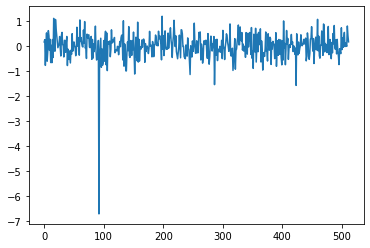

In [8]:
import matplotlib.pyplot as plt
plt.plot(data[0][0])
plt.show()

In [80]:
d1 = [np.load(f'/home/jpinkney/code/clip2latent/data/sg2-ffhq-1024-clip/00000/00000000{i}.img_feat.npy') for i in range(3)]
d2 = [np.load(f'/home/jpinkney/code/clip2latent/data/sg2-ffhq-1024-clip/00001/000010{i+1}00.img_feat.npy') for i in range(3)]

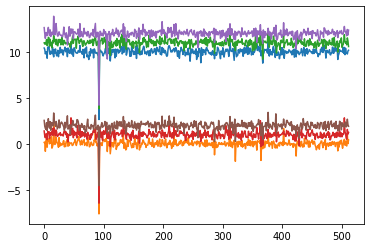

In [81]:
for i in range(3):
    plt.plot(10+i+d1[i])
    plt.plot(i+d2[i])
plt.show()

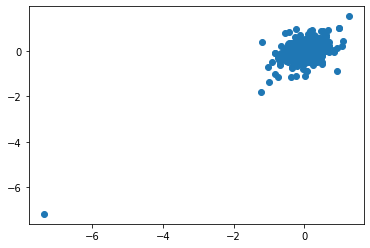

In [82]:
plt.scatter(d1[0], d1[1])
plt.show()